In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [3]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

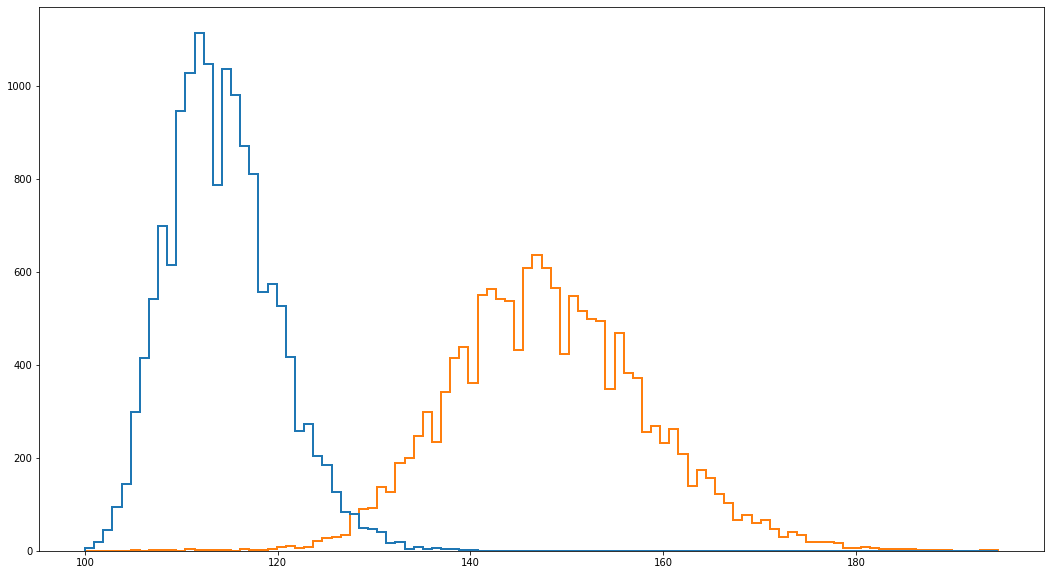

In [4]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2)
plt.show()

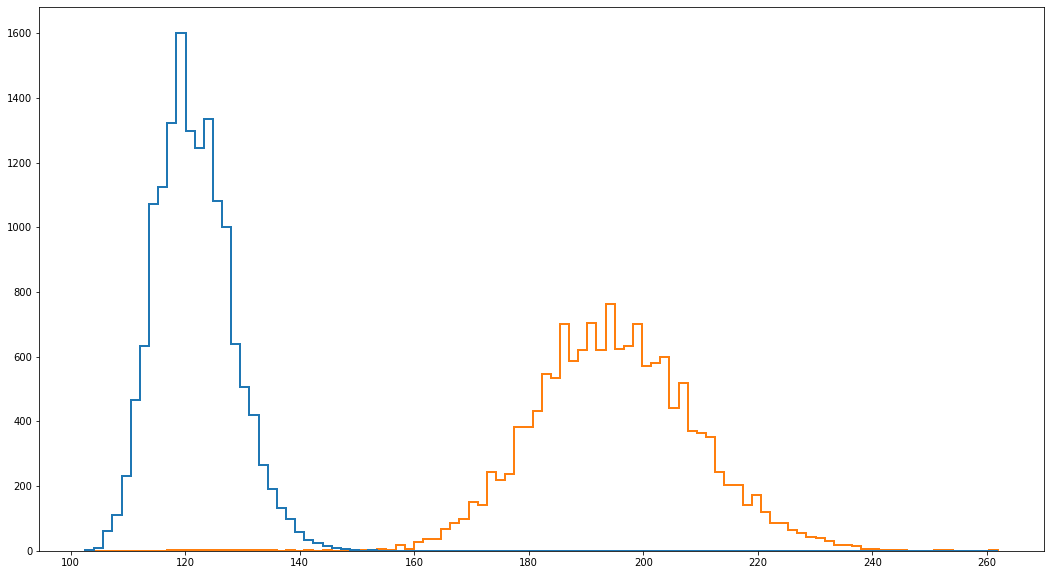

In [5]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2)
plt.show()

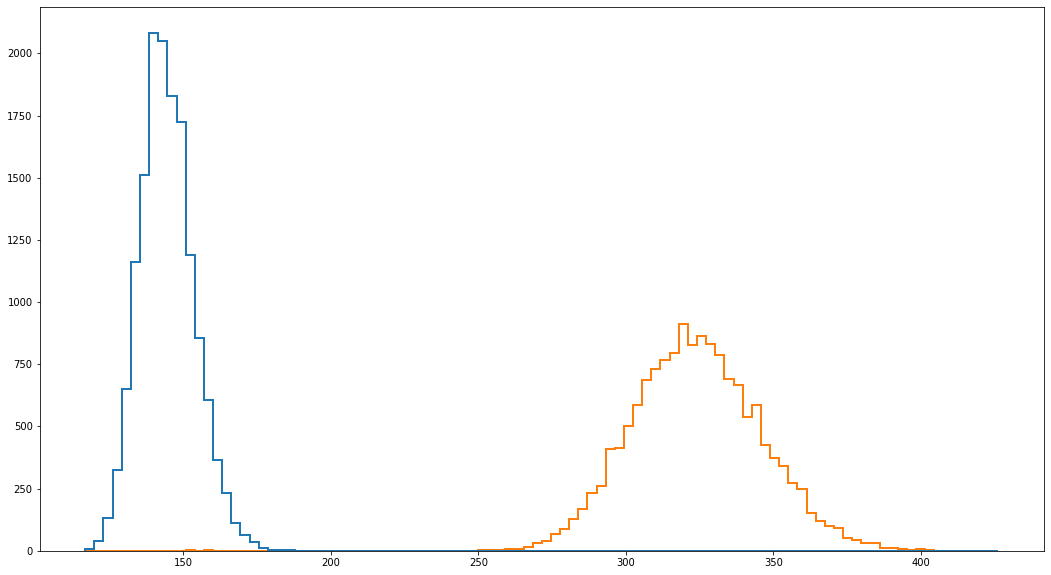

In [6]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2)
plt.show()

### Defino dist de Poisson y factorial

In [45]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb):
    num =  np.exp(-lmb) * lmb**datos
    den = factorial(datos)
    return num/den



# Fitteamos Poisson a mano para la calibración 5

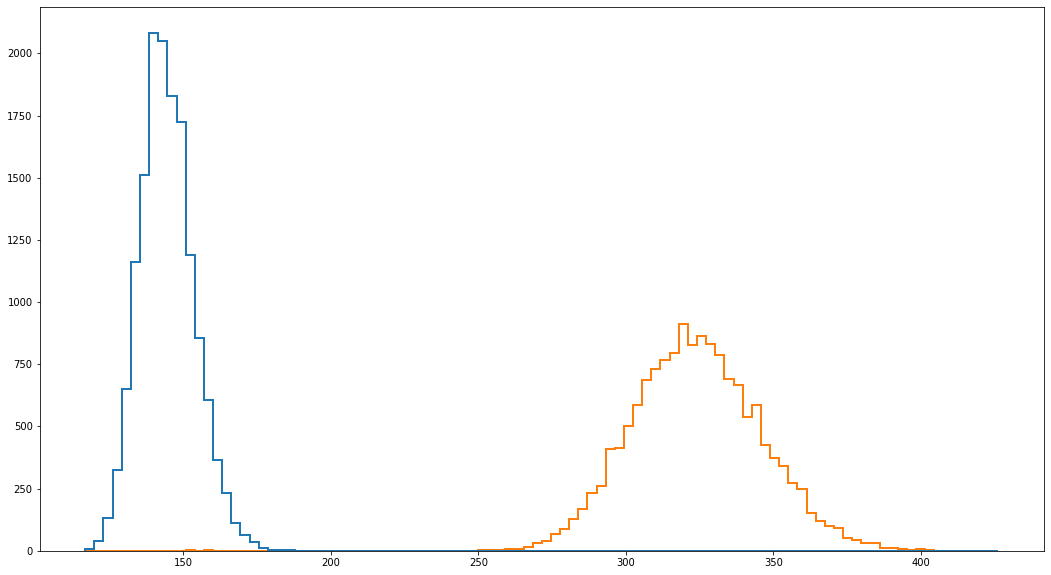

In [173]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal5, bins=100, histtype="step", linewidth=2)
plt.show()

In [174]:
print(bins)
print(n0, n1)
print(np.diff(bins))

[116.75  119.845 122.94  126.035 129.13  132.225 135.32  138.415 141.51
 144.605 147.7   150.795 153.89  156.985 160.08  163.175 166.27  169.365
 172.46  175.555 178.65  181.745 184.84  187.935 191.03  194.125 197.22
 200.315 203.41  206.505 209.6   212.695 215.79  218.885 221.98  225.075
 228.17  231.265 234.36  237.455 240.55  243.645 246.74  249.835 252.93
 256.025 259.12  262.215 265.31  268.405 271.5   274.595 277.69  280.785
 283.88  286.975 290.07  293.165 296.26  299.355 302.45  305.545 308.64
 311.735 314.83  317.925 321.02  324.115 327.21  330.305 333.4   336.495
 339.59  342.685 345.78  348.875 351.97  355.065 358.16  361.255 364.35
 367.445 370.54  373.635 376.73  379.825 382.92  386.015 389.11  392.205
 395.3   398.395 401.49  404.585 407.68  410.775 413.87  416.965 420.06
 423.155 426.25 ]
[   9.   41.  133.  324.  652. 1163. 1513. 2082. 2051. 1827. 1723. 1189.
  854.  606.  366.  232.  113.   64.   35.   12.    5.    3.    3.    0.
    0.    0.    0.    0.    0.    0.   

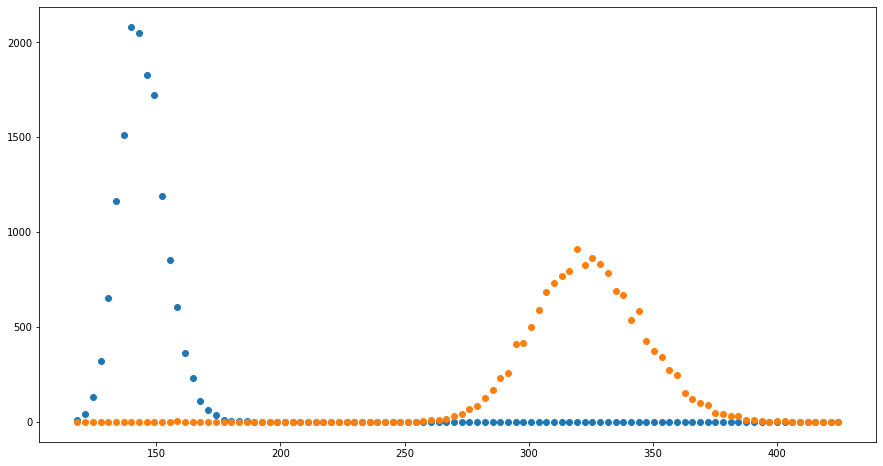

In [175]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

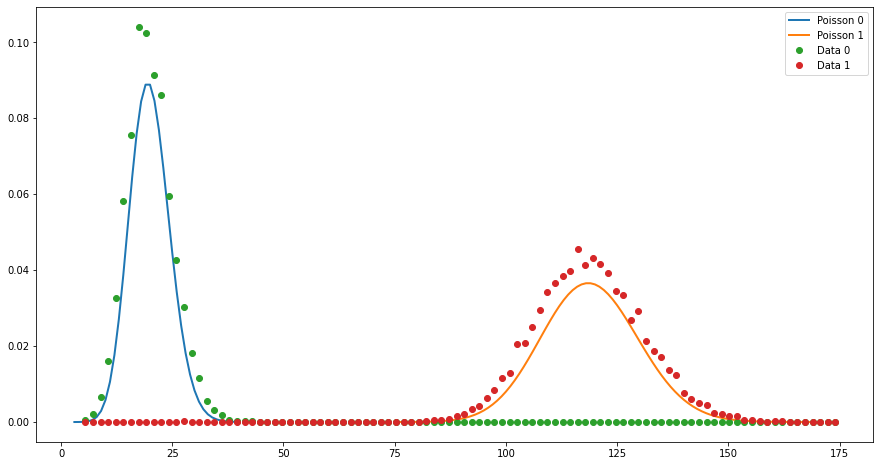

In [197]:
mu0 = 20
mu1 = 119
x_poisson0 = np.arange(3, 40, 1, dtype=int)
x_poisson1 = np.arange(75, 170, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

offset = min(x)-10
scale_y = 5e-5
scale_x = 0.55

fig, ax = plt.subplots(1, figsize=(15,8))

ax.plot(x_poisson0, poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)
ax.plot()

ax.plot((x-offset)*scale_x , y0*scale_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1*scale_y, 'o', label="Data 1")

plt.legend()
plt.show()

# Fitteamos Poisson a mano para la medición 2

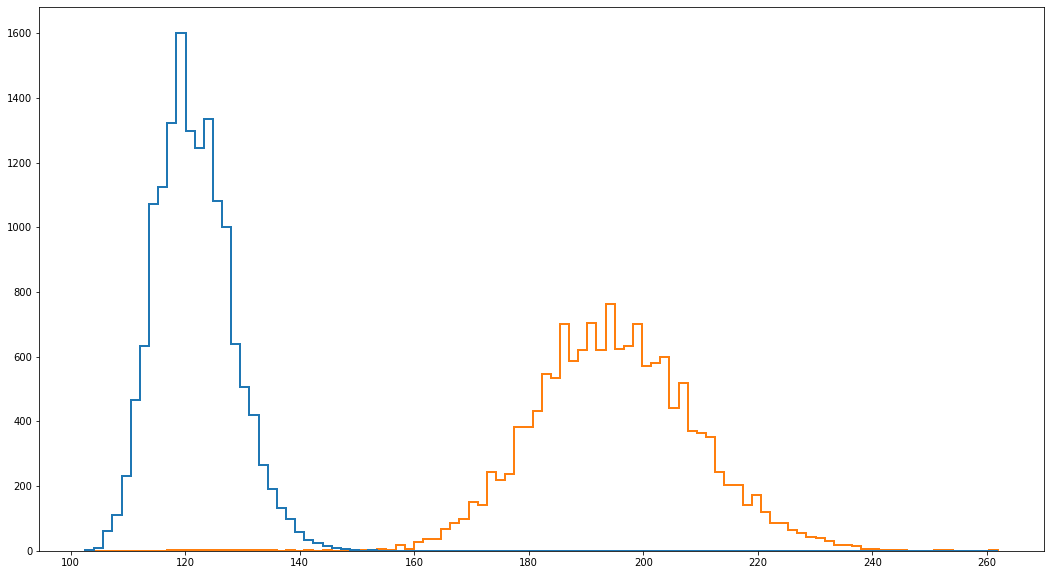

In [198]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2)
plt.show()

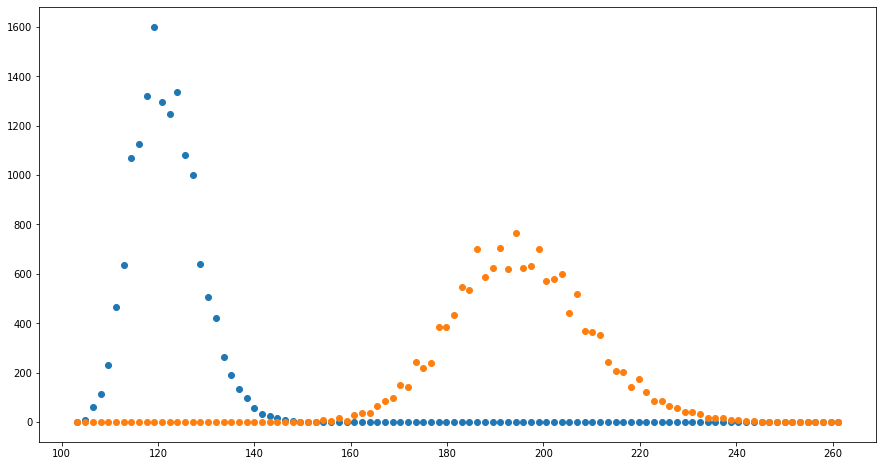

In [199]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

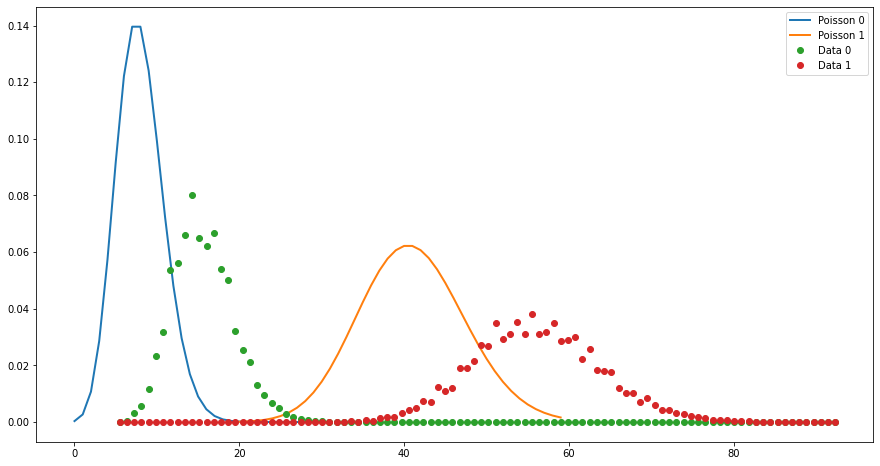

In [201]:
mu0 = 8
mu1 = 41
x_poisson0 = np.arange(0, 32, 1, dtype=int)
x_poisson1 = np.arange(20, 60, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

offset = min(x)-10
scale_y = 5e-5
scale_x = 0.55

fig, ax = plt.subplots(1, figsize=(15,8))

ax.plot(x_poisson0, poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x , y0*scale_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1*scale_y, 'o', label="Data 1")

plt.legend()
plt.show()

In [ ]:
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=[] )